**Business Understanding**
- **Tujuan:** Membantu perusahaan pelayanan atau pihak terkait memahami faktor-faktor yang mempengaruhi keselamatan penumpang, serta memprediksi kemungkinan selamatnya penumpang berdasarkan karakteristik tertentu.
- **Manfaat:**
  *   dapat memberika insught untuk perbaikan sistem keselamatan di masa depan
  *   dapat digunakan untuk pelatihan model prediksi pada kasus serupa di industri  transportasi
- **Output Model:** prediksi (0 = Tidak selamat, 1 = selamat) untuk setiap penumpang berdasarkan fitur input.

 selanjutnya kita akan membangun model neural network dengan 2 hidden layer menggunakan data ini.

# **Import Library dan Load Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#load data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1MrpRwkHz8nnkWlsGGQx74olZf6D1KFQ6')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


# **Data Preparation**

In [ ]:
#Misal kolom target bernama 'Survived' dan fitur lain sudah bersih
X = df.drop('Survived', axis=1)
y = df['Survived']

#Split data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Membangun Arsitektur Neural Network (2 Hidden Layer)**

In [ ]:
#Membuat model neural network dengan 2 hidden layer
model = Sequential()

#Input layer dan hidden layer pertama (16 neuron, aktivasi relu)
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
#Hidden layer kedua (8 neuron, aktivasi relu)
model.add(Dense(8, activation='relu'))
#Output layer (1 neuron, aktivasi sigmoid untuk klasifikasi biner)
model.add(Dense(1, activation='sigmoid'))

#Menampilkan ringkasan arssitektur model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

# **Kompilasi dan Training Model**

In [ ]:
#Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6357 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6198 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6582 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6317 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6646 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6370 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6141 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6357 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

# **Evaluasi Model**

In [ ]:
#Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss pada data test     : {loss:.2f}')
print(f'Accuracy pada data test : {accuracy:.2f}')

Loss pada data test     : nan
Accuracy pada data test : 0.60


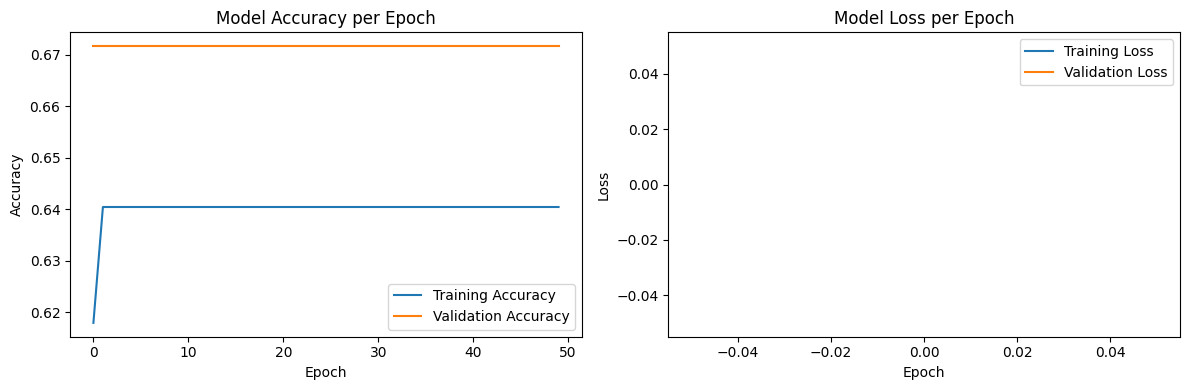

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

#Visualisasi Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()